<a href="https://colab.research.google.com/github/kafikewu/Gene-Conservation-Calculation/blob/main/CDR_conservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization
It installs the `Biopython` package.
Google Drive mount is only required if Google Colab is used.

In [1]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initialize the dataframe
We need two separe dataframes for CDR1 and CDR2 regions



In [7]:
from Bio import SeqIO
import pandas as pd

# Consensus sequence
REFDIR = "/content/drive/MyDrive/Purdue/Elancco/find_common/cs_updated.fasta"
# cs -> Consensus Sequence
cs_dict = SeqIO.to_dict(SeqIO.parse(REFDIR, "fasta"))
all_genes = list(cs_dict.keys())
all_genes.sort(key= lambda x: x.replace("IG", ''))

In [8]:
# Create a dataframe
import pandas as pd
entire_dataframe = pd.DataFrame(columns=['Dog', 'Breed'] + all_genes)
entire_dataframe.set_index(['Dog'], inplace=True)
# entire_dataframe now consist of all the gene under consideration.
print(entire_dataframe)

Empty DataFrame
Columns: [Breed, IGHV1-30, IGHV3-10, IGHV3-13, IGHV3-16, IGHV3-18, IGHV3-19, IGHV3-2, IGHV3-23, IGHV3-24, IGHV3-3, IGHV3-32, IGHV3-35, IGHV3-37, IGHV3-38, IGHV3-39, IGHV3-41, IGHV3-44, IGHV3-46, IGHV3-47, IGHV3-5, IGHV3-50, IGHV3-54, IGHV3-58, IGHV3-6, IGHV3-61, IGHV3-67, IGHV3-69, IGHV3-7, IGHV3-70, IGHV3-75, IGHV3-76, IGHV3-8, IGHV3-80, IGHV3-81, IGHV3-82, IGHV3-9, IGHV4-1, IGKV2-10, IGKV2-11, IGKV2-4, IGKV2-5, IGKV2-6, IGKV2-7, IGKV2-8, IGKV2-9, IGKV4-15, IGLV1-100, IGLV1-103, IGLV1-106, IGLV1-111, IGLV1-116, IGLV1-125, IGLV1-144, IGLV1-157, IGLV1-158, IGLV1-162, IGLV1-37, IGLV1-41, IGLV1-44, IGLV1-46, IGLV1-48, IGLV1-49, IGLV1-50, IGLV1-55, IGLV1-56, IGLV1-57, IGLV1-58, IGLV1-66, IGLV1-67, IGLV1-70, IGLV1-72, IGLV1-73, IGLV1-75, IGLV1-82, IGLV1-84, IGLV1-86, IGLV1-87, IGLV1-92, IGLV1-94, IGLV1-96, IGLV2-31, IGLV3-11, IGLV3-14, IGLV3-19, IGLV3-2, IGLV3-21, IGLV3-24, IGLV3-25, IGLV3-26, IGLV3-27, IGLV3-28, IGLV3-29, IGLV3-3, IGLV3-30, IGLV3-4, IGLV3-8, IGLV4-10, IGLV4

In [9]:
import pandas as pd
from Bio import pairwise2
from Bio.Seq import Seq

/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


> In case we want to map individual dogs to breeds the following will be need. Otherwise, please make sure to remove the `Breed` column. It can be done with `entire_dataframe.drop(columns=['Breed'])`

In [10]:
DOG_TO_BREED = '/content/drive/MyDrive/Purdue/Elancco/find_common/find_common.csv'

In [11]:
# Map dog to breed

mapping = pd.read_csv(DOG_TO_BREED)
cleared_mapping = mapping[['Sample Name', 'Breed/Type']]
cleared_mapping['Breed'] = cleared_mapping['Breed/Type']
cleared_mapping = cleared_mapping.drop(columns=['Breed/Type'])
cleared_mapping.set_index('Sample Name', inplace=True)

# Cavalier King Charles Spaniel is very difficult to put on any vizualization.
# CKCS is more appropriate
cleared_mapping.Breed = cleared_mapping.Breed.apply(lambda x:'CKCS'
                                            if 'Cavalier King Charles Spaniel'in x
                                            else x)

print(cleared_mapping.Breed.to_list())

['Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Pomeranian', 'Whippet', 'Whippet', 'Whippet', 'Whippet', 'Whippet', 'Whippet', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Portuguese Water Dog', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Dachshund', 'Brittany', 'Brittany', 'Brittany', 'Brittany', 'Brittany', 'Brittany', 'Brittany', 'Brittany', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Bouvier des Flandres', 'Collie', 'Collie', 'Collie', 'Collie', 'Collie', 'Collie'

<ipython-input-11-0ebfe1defb87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_mapping['Breed'] = cleared_mapping['Breed/Type']


## File Read
Read in the CDR1 and CDR2 lengths and store them into two separate dataframes

In [13]:
dog_vs_gene_cdr1 = entire_dataframe.copy()
dog_vs_gene_cdr2 = entire_dataframe.copy()
dog_vs_gene_cdr1.drop(columns=['Breed'], inplace=True)
dog_vs_gene_cdr2.drop(columns=['Breed'], inplace=True)
# print(dog_vs_gene_cdr1)

In [14]:
import os
import pandas as pd
from collections import defaultdict
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

genes = ['CDR-IGHV', 'CDR-IGKV', 'CDR-IGLV']
# genes = ['CDR-IGLV']
for g in genes:
    print(f"\nProcessing gene group: {g}")
    curpath = f"/content/drive/MyDrive/Purdue/Elancco/{g}"

    for d in os.listdir(curpath):
        try:
            dog_dict = pd.read_csv(f"{curpath}/{d}")
            CDR1_temp = {}
            CDR2_temp = {}
        except Exception as e:
            print(f"Could not read file {d}: {e}")
            continue

        # Build full sequence
        dog_dict['full'] = (
            dog_dict['L-FR1'] + dog_dict['L-CDR1'] +
            dog_dict['L-FR2'] + dog_dict['L-CDR2'] +
            dog_dict['L-FR3'] + dog_dict['L-CDR3']
        )

        # Extract clean gene name
        def extract_gene(raw_gene):
            try:
                return raw_gene.split('_')[1].split('(')[0]
            except Exception:
                return raw_gene

        dog_dict['Gene'] = dog_dict['Gene'].apply(extract_gene)

        dog = defaultdict(float)
        dog_name = d.split("_")[0]

        for gene, ref_seq in cs_dict.items():
            match_rows = dog_dict[dog_dict['Gene'] == gene]

            # print(cdr_1)


            if match_rows.empty:
                continue
            # if gene in ['IGKV2-11', 'IGKV4-15']:
            #     continue

            cdr_1 = match_rows['L-CDR1'].values[0]
            cdr_1 = cdr_1.replace("-", "").replace("_", "")
            # print(cdr_1)

            cdr_2 = match_rows['L-CDR2'].values[0]
            cdr_2 = cdr_2.replace("-", "").replace("_", "")

            sample_seq = match_rows['full'].values[0]
            sample_seq = sample_seq.replace("-", "").replace("_", "")

            CDR1_temp[gene] = len(cdr_1)
            CDR2_temp[gene] = len(cdr_2)

        for k in CDR1_temp.keys():
            # print(k)
            dog_vs_gene_cdr1.loc[dog_name, k] = CDR1_temp[k]
            dog_vs_gene_cdr2.loc[dog_name, k] = CDR2_temp[k]
        dog_vs_gene_cdr1.loc[dog_name, ['Breed']] = cleared_mapping.loc[dog_name].Breed
        dog_vs_gene_cdr2.loc[dog_name, ['Breed']] = cleared_mapping.loc[dog_name].Breed
        dog['Breed'] = cleared_mapping.loc[dog_name].Breed if dog_name in cleared_mapping.index else "Unknown"

        # Save to final DataFrame
        entire_dataframe.loc[dog_name, dog.keys()] = dog.values()
        dog['Dog'] = dog_name



Processing gene group: CDR-IGHV

Processing gene group: CDR-IGKV

Processing gene group: CDR-IGLV
Could not read file .ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/MyDrive/Purdue/Elancco/CDR-IGLV/.ipynb_checkpoints'


## Post Processing



### Sort by Breed names
This block is necessary to sort the dog breeds by name. Even if we want to sort it by similarity, this part should be included.

In [23]:
# Ideally you want the Breed to be the index
dog_vs_gene_cdr1.set_index(['Breed'], inplace=False)
dog_vs_gene_cdr2.set_index(['Breed'], inplace=False)
dog_vs_gene_cdr1 = dog_vs_gene_cdr1.fillna(value=0)
dog_vs_gene_cdr2 = dog_vs_gene_cdr2.fillna(value=0)

dog_vs_gene_cdr1.sort_index()
dog_vs_gene_cdr2.sort_index()
print(entire_dataframe.columns)


Index(['Breed', 'IGHV1-30', 'IGHV3-10', 'IGHV3-13', 'IGHV3-16', 'IGHV3-18',
       'IGHV3-19', 'IGHV3-2', 'IGHV3-23', 'IGHV3-24',
       ...
       'IGLV5-64', 'IGLV5-85', 'IGLV8-102', 'IGLV8-108', 'IGLV8-128',
       'IGLV8-161', 'IGLV8-36', 'IGLV8-74-1', 'IGLV8-93', 'IGLV8-99'],
      dtype='object', length=113)


### Save the tables if necessary

In [17]:
dog_vs_gene_cdr1.to_csv('CDR1.csv', index=True)
dog_vs_gene_cdr2.to_csv('CDR2.csv', index=True)

## Plot the CDR2 and CDR1

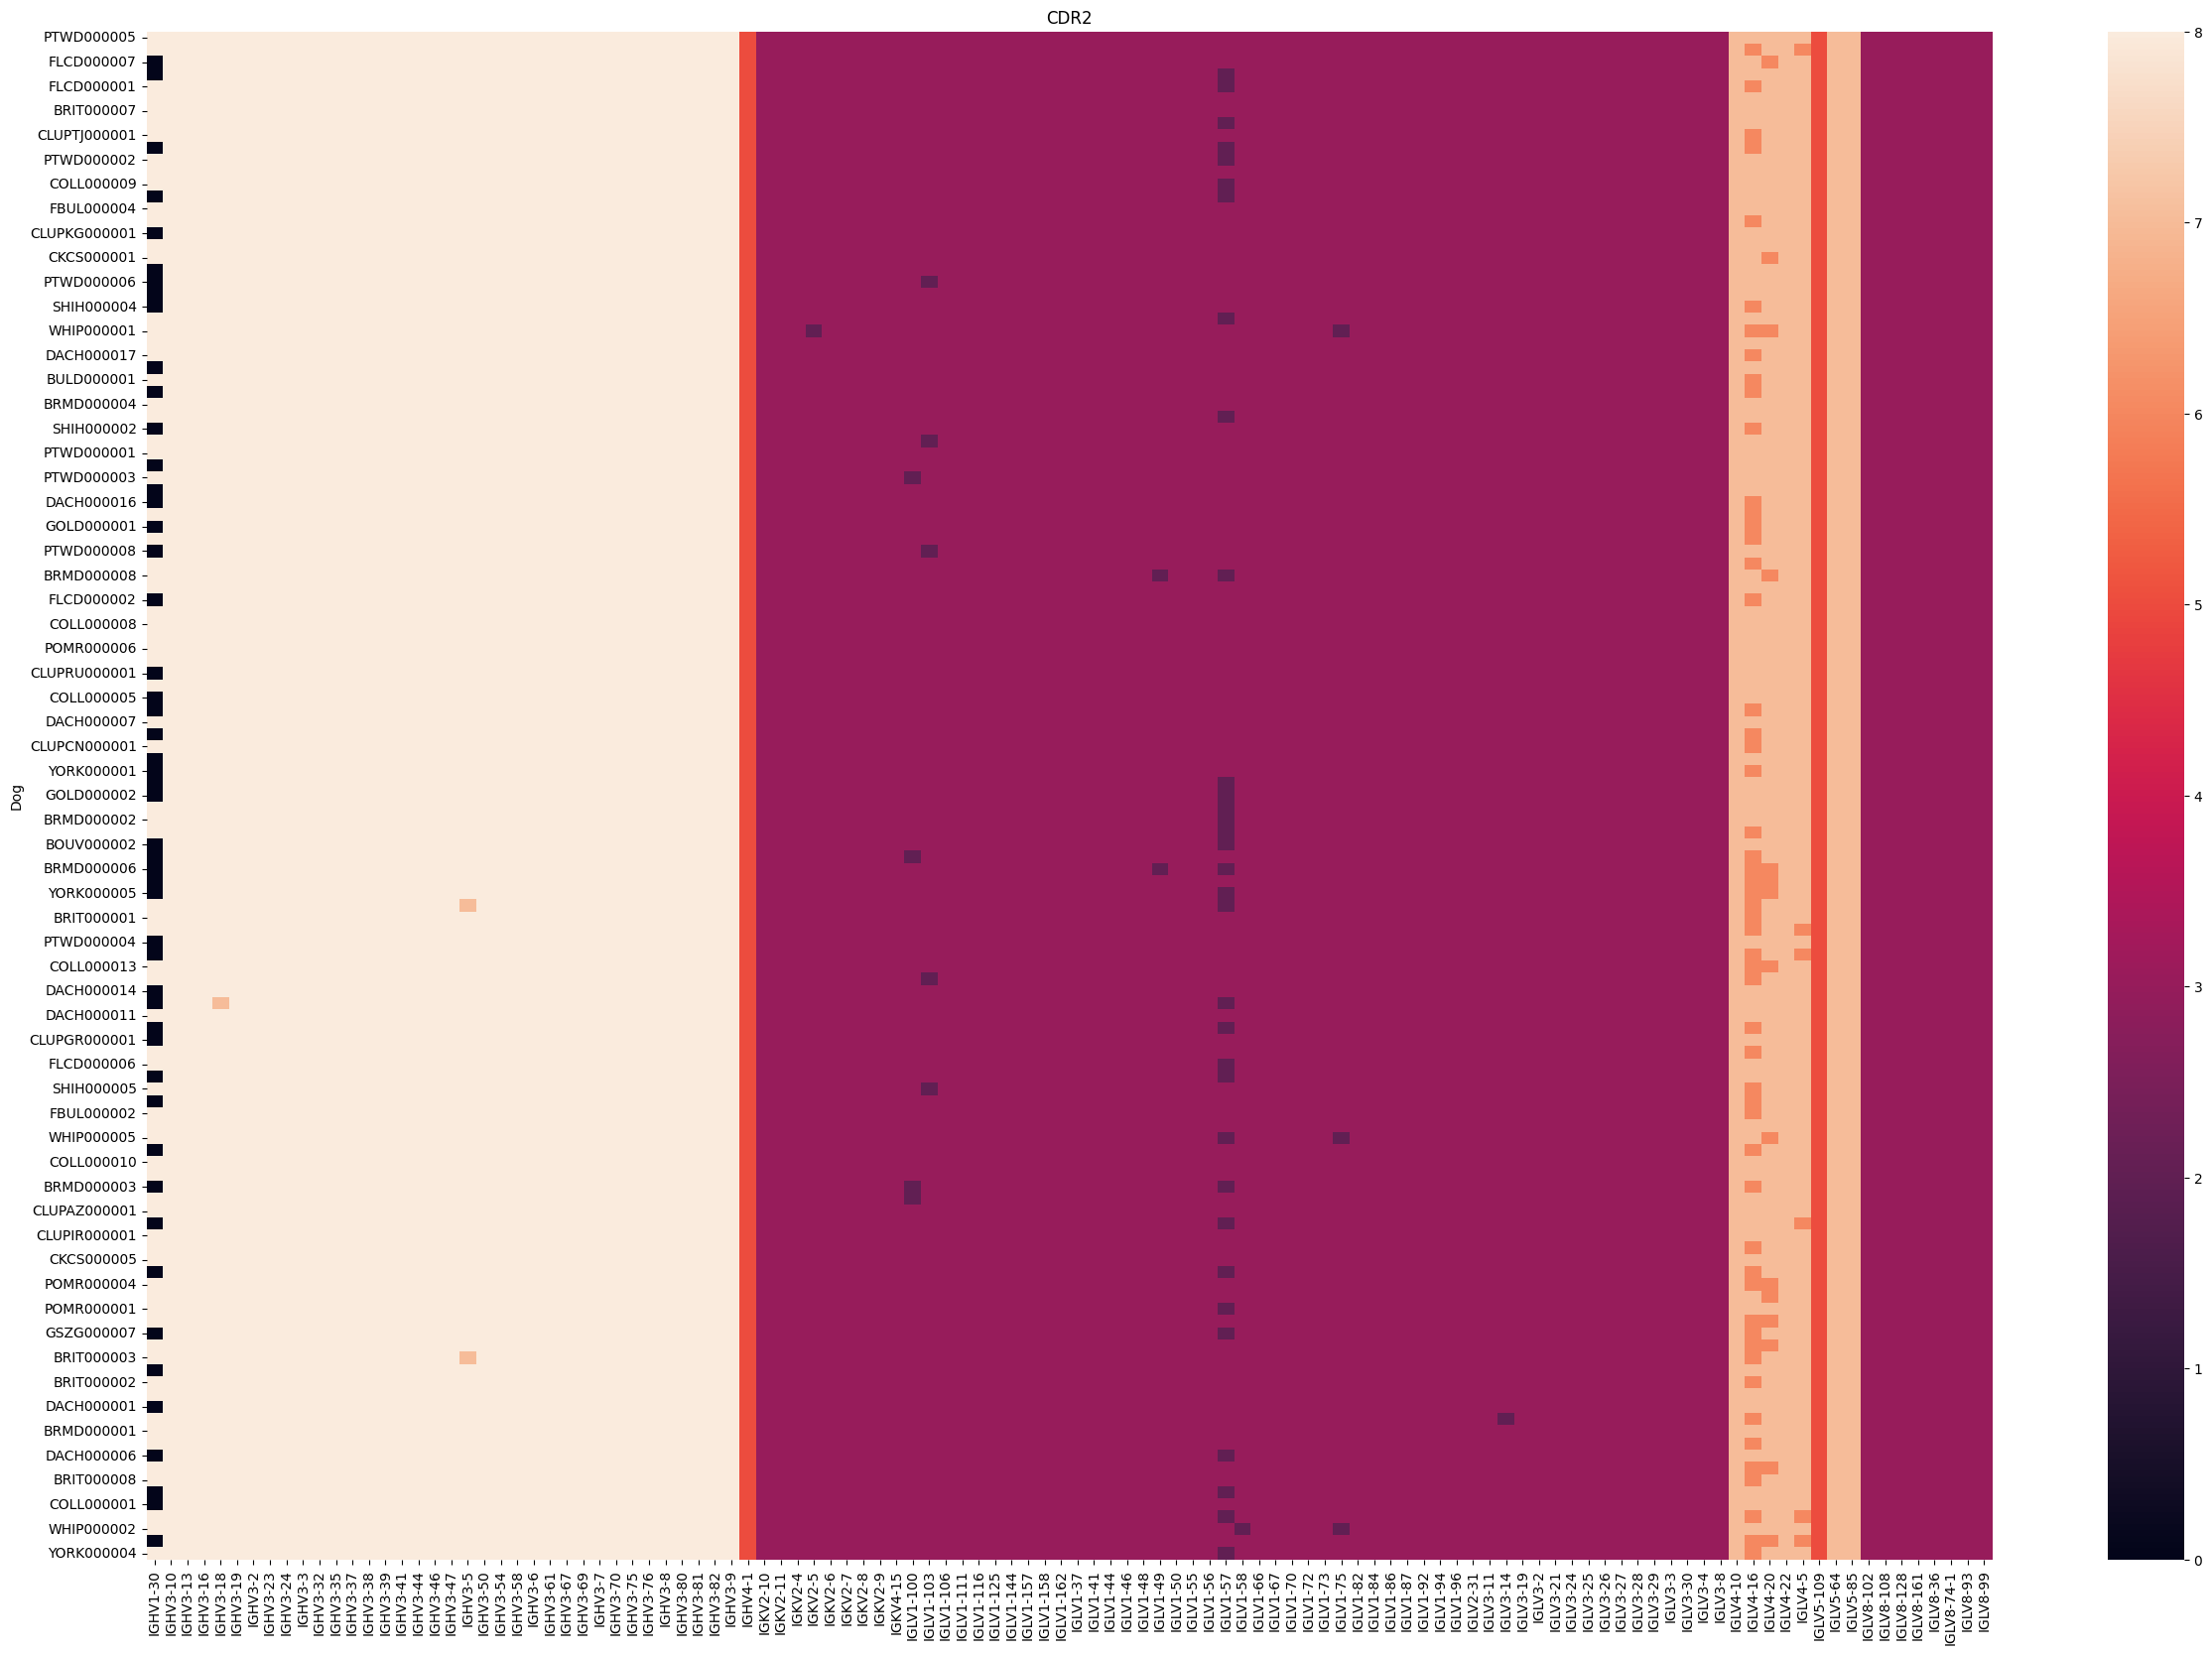

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20))

f = sns.heatmap(dog_vs_gene_cdr2.drop(columns=['Breed']), ax=ax)

f.set_title("CDR2")
plt.savefig("CDR2.jpg", bbox_inches="tight", pad_inches=0, dpi=300)


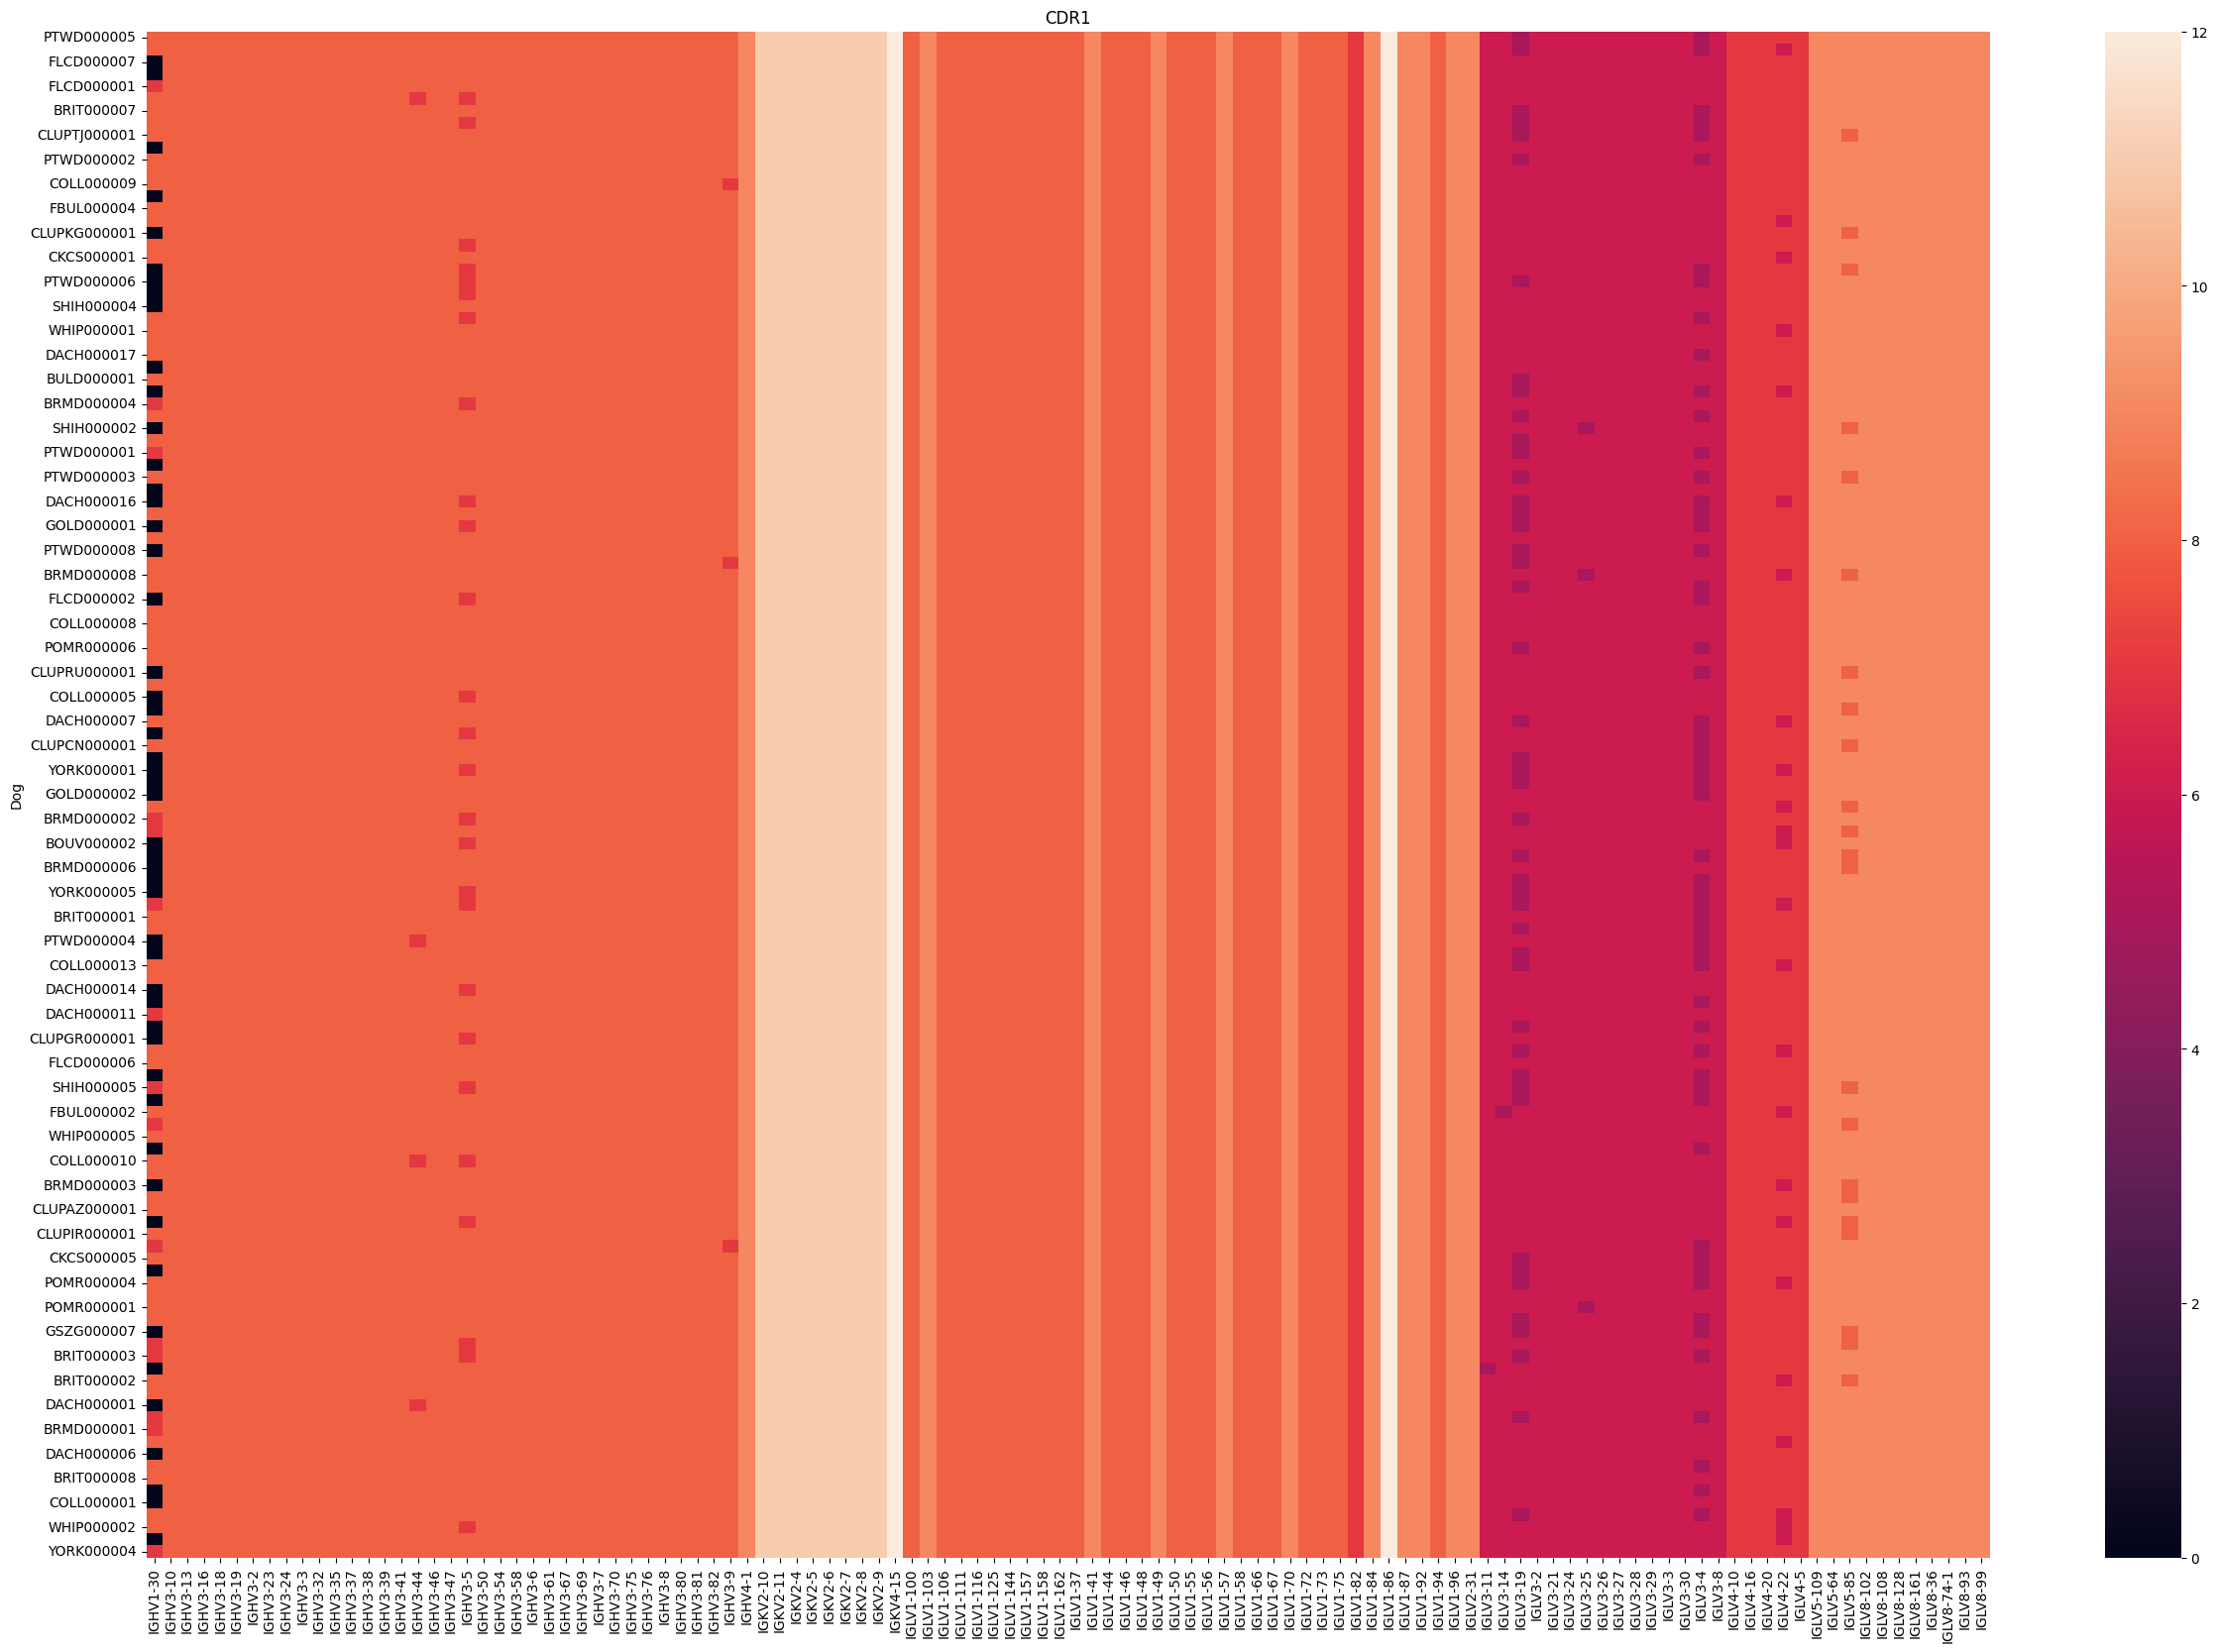

In [35]:
fig, ax = plt.subplots(figsize=(30, 20))
f = sns.heatmap(dog_vs_gene_cdr1.drop(columns=['Breed']), ax=ax)

f.set_title("CDR1")
plt.savefig("CDR1.jpg", bbox_inches="tight", pad_inches=0, dpi=300)